# Modeling Water Flow on the Sphere with FNO

The spherical Fourier Neural Operator (SFNO) presents a promising approach for solving geophysical fluid dynamics problems, particularly the Shallow Water Equations (SWE) which are fundamental for modeling atmospheric and oceanic dynamics. SFNO leverages the spherical geometry of Earth's surface, allowing for more accurate efficient predictions compared to traditional methods.

In this notebook you can find a further analysis of the behavior and a comparison of both methods, SFNO and FNO for the SWE problem.

By making the assumption that the wave height is very small compared to the mean height ($ h \ll H $), we have (without lateral viscous forces) the following systems of equations

## Shallow Water Equations
$$
\frac{\partial h}{\partial t} + H \cdot \left(\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}\right) = 0 ,
$$


$$
\frac{\partial u}{\partial t} -f\cdot v = -g \cdot \frac{\partial h}{\partial x} - k \cdot u ,
$$


$$
\frac{\partial v}{\partial t} + f \cdot u = -g \cdot \frac{\partial h}{\partial y} - k \cdot v .
$$

where:

$\textbf{u}$ is the velocity in x direction,

$\textbf{v}$ is the velocity in y direction,

$\textbf{h}$ is the height deviation of the horizontal pressure surface from its mean height, 

$\textit{g}$ is the acceleration due to gravity,

$\textit{k}$ is the viscous drag coefficient,

$\textit{f}$ is the Coriolis coefficient,

$\textit{H}$ is the mean height of the horizontal pressure surface

For more information and the SWE problem without the assumptions, you can find more information on the following website: [Shallow Water Equations](https://en.wikipedia.org/wiki/Shallow_water_equations).

In [9]:
# Import Libraries
import sys
import os
current_directory = os.getcwd()
nn_directory = os.path.join(current_directory, 'nn_models')
sys.path.append(nn_directory)

from training import Trainer
from nn_models.fno2d import FNO2d
from nn_models.sfno import SFNO

In [10]:
# Setup the Models and the Trainer
modes_x = 32
modes_y = 32

fno_architecture = {"modes" : [modes_x, modes_y], # modes for FNO and SFNO
                    "width" : 64, # number of neurons
                    "n_layers" : 2, # how many hidden layer
                    "retrain_fno" : 0} # Relevant for the seed

model_sfno = SFNO(fno_architecture)
sfno = Trainer(model_sfno)

model_fno = FNO2d(fno_architecture)
fno = Trainer(model_fno)

Loading train dataloader at resolution (32, 64) with 200 samples and batch-size=1
Loading test dataloader at resolution (32, 64) with 50 samples and batch-size=1
Loading test dataloader at resolution (64, 128) with 50 samples and batch-size=1
Loading train dataloader at resolution (32, 64) with 200 samples and batch-size=1
Loading test dataloader at resolution (32, 64) with 50 samples and batch-size=1
Loading test dataloader at resolution (64, 128) with 50 samples and batch-size=1


## Plot the Training Data

/home/yannick/ETH_Zurich/AISE/Project_2/Task2/training.py:183: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


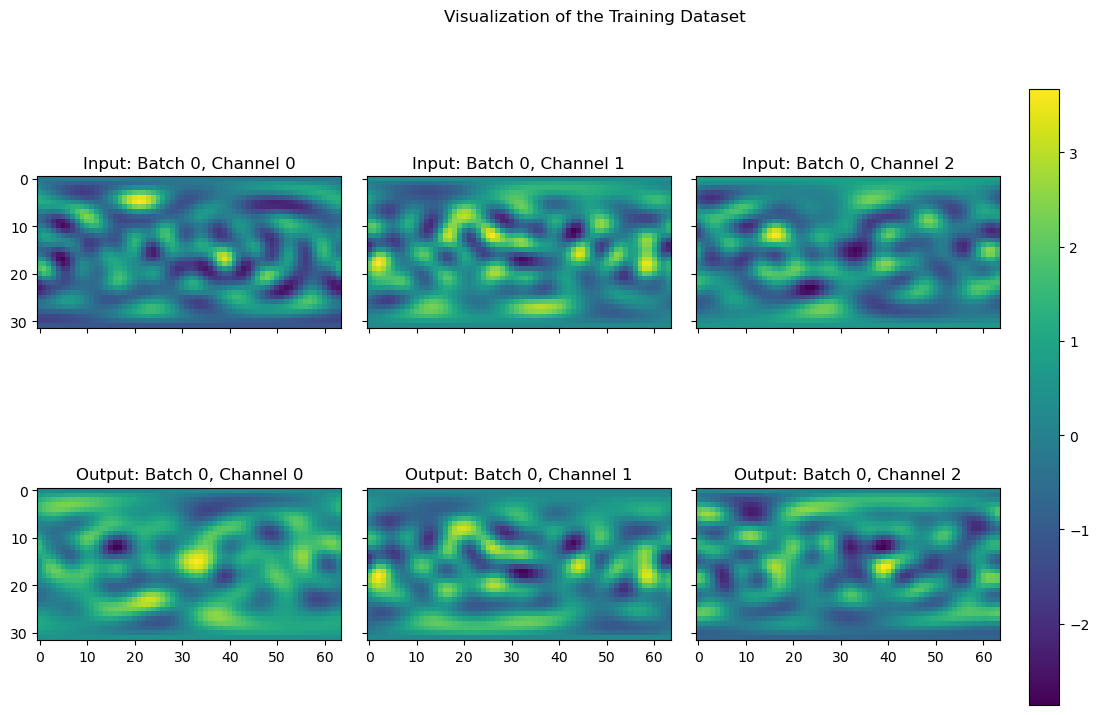

In [11]:
# Plot the Training Data for all different channels
# u, v, h are the 3 channels for swe problem
fno.plot_training_data()

## SFNO Training

######### Epoch: 0  ######### Train Loss: 0.30575515076518056  ######### Relative L2 Test Norm: 119.07515182495116
######### Epoch: 1  ######### Train Loss: 0.09807448834180832  ######### Relative L2 Test Norm: 118.72538032531737
######### Epoch: 2  ######### Train Loss: 0.09018662869930268  ######### Relative L2 Test Norm: 119.32950973510742
######### Epoch: 3  ######### Train Loss: 0.08450791269540786  ######### Relative L2 Test Norm: 119.83896484374999
######### Epoch: 4  ######### Train Loss: 0.07834829896688461  ######### Relative L2 Test Norm: 120.3049331665039
######### Epoch: 5  ######### Train Loss: 0.0708860656619072  ######### Relative L2 Test Norm: 120.71861724853515
######### Epoch: 6  ######### Train Loss: 0.06177588507533074  ######### Relative L2 Test Norm: 121.10425872802735
######### Epoch: 7  ######### Train Loss: 0.05019658051431179  ######### Relative L2 Test Norm: 121.33731689453126
######### Epoch: 8  ######### Train Loss: 0.0350270239636302  ######### Relative L

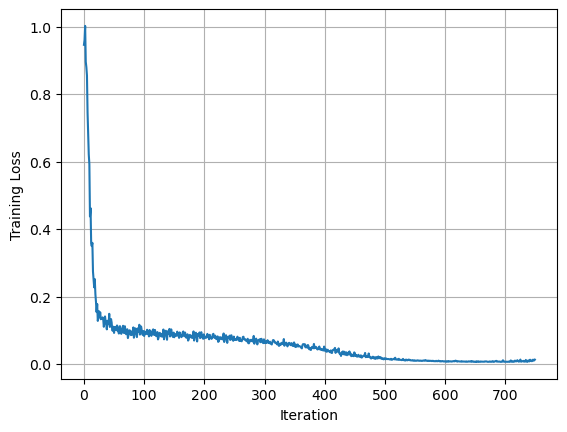

In [12]:
# Train first the SFNO Model:
learning_rate = 0.001
epochs = 15
step_size = 50 
gamma = 0.5

# train the sfno model
sfno.train(epochs, learning_rate, step_size, gamma)

# plot the training loss function:
sfno.plot_trainloss()

## FNO Training

######### Epoch: 0  ######### Train Loss: 0.3826443928480148  ######### Relative L2 Test Norm: 128.6407211303711
######### Epoch: 1  ######### Train Loss: 0.20568708211183548  ######### Relative L2 Test Norm: 126.67353286743165
######### Epoch: 2  ######### Train Loss: 0.14472302675247192  ######### Relative L2 Test Norm: 116.99626998901368
######### Epoch: 3  ######### Train Loss: 0.08071664601564407  ######### Relative L2 Test Norm: 111.16543846130371
######### Epoch: 4  ######### Train Loss: 0.055188116058707236  ######### Relative L2 Test Norm: 107.2233642578125
######### Epoch: 5  ######### Train Loss: 0.041361130252480505  ######### Relative L2 Test Norm: 105.00568008422852
######### Epoch: 6  ######### Train Loss: 0.03226247563958168  ######### Relative L2 Test Norm: 103.681693649292
######### Epoch: 7  ######### Train Loss: 0.02561616066843271  ######### Relative L2 Test Norm: 102.7037124633789
######### Epoch: 8  ######### Train Loss: 0.020657048001885413  ######### Relative L

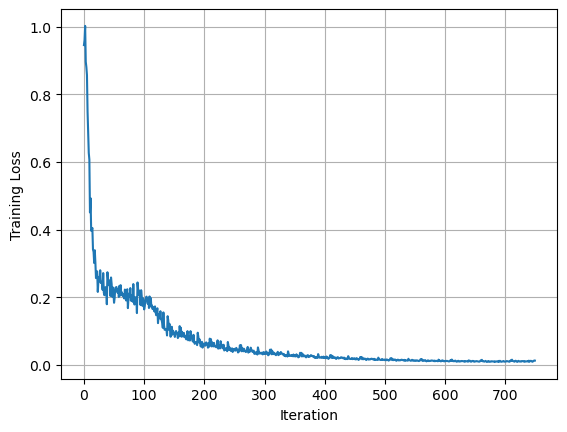

In [13]:
# Now train and plot the loss function of the FNO model:
fno.train(epochs, learning_rate, step_size, gamma)
fno.plot_trainloss()

## Comparison and Validation of SFNO and FNO Results

/home/yannick/ETH_Zurich/AISE/Project_2/Task2/training.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


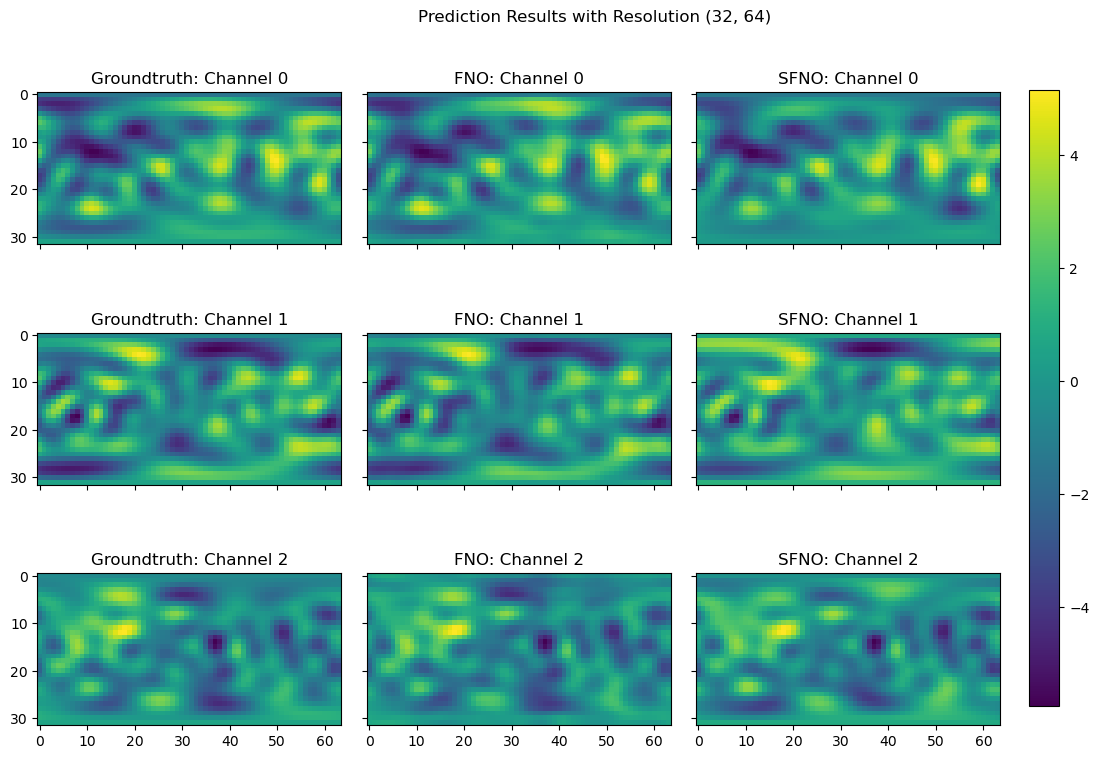

In [14]:
# Now make the predictions for 2 different resolutions for both models
pred_sfno_res1, pred_sfno_res2 = sfno.predict()
pred_fno_res1, pred_fno_res2 = fno.predict()

# Next plot the groundtruth, sfno and fno results:
sfno.plot_fno_sfno(pred_fno_res1, pred_sfno_res1)

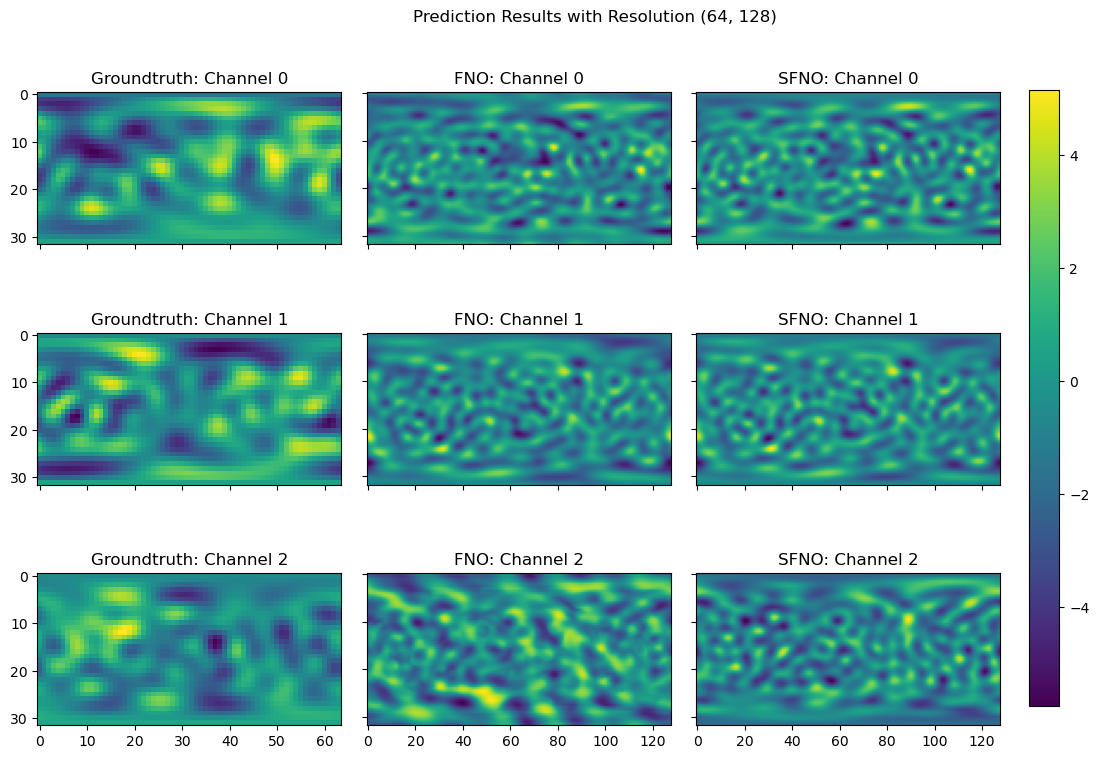

In [15]:
# now we want to compare the results for a higher resolution (64, 128)
resolution = "out-dist"
batch = 0
sfno.plot_fno_sfno(pred_fno_res2, pred_sfno_res2, batch_idx=batch, res=resolution)

/home/yannick/ETH_Zurich/AISE/Project_2/Task2/training.py:331: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


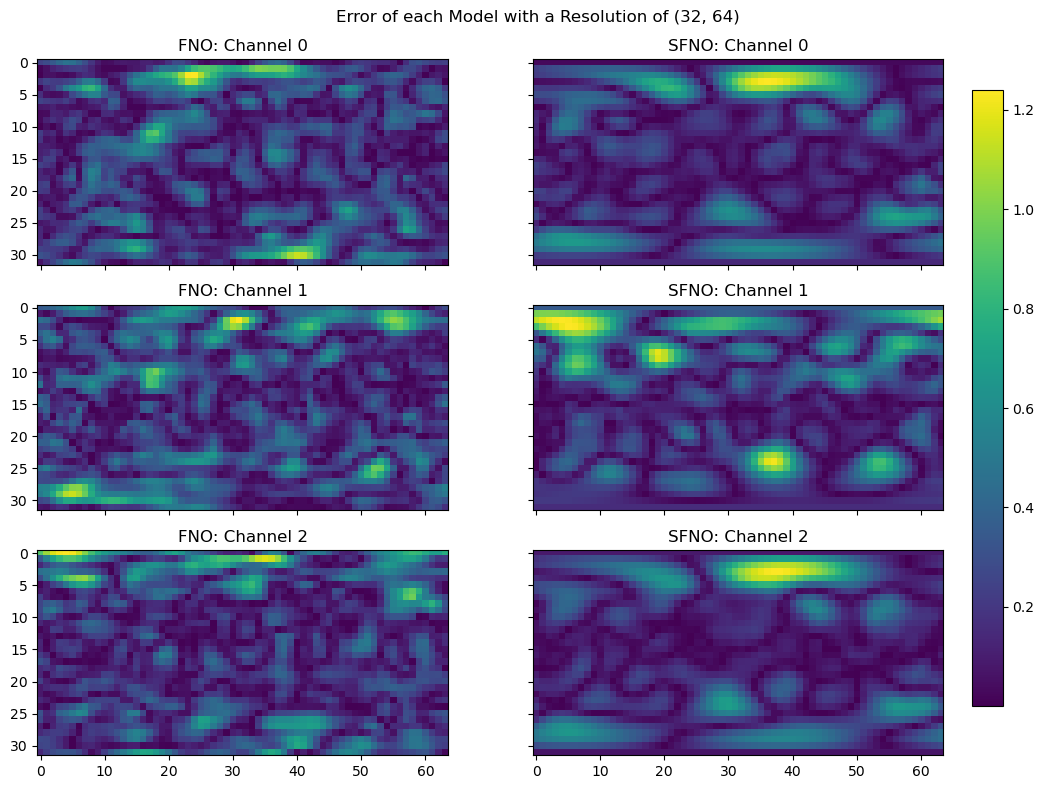

In [16]:
# Also it could be helpful to see where the FNO and where the SFNO is failing
# thus the following plot describes the local error for the predictions while 
# comparing them to the groundtruth

sfno.errplot_fno_sfno(pred_fno_res1, pred_sfno_res1)

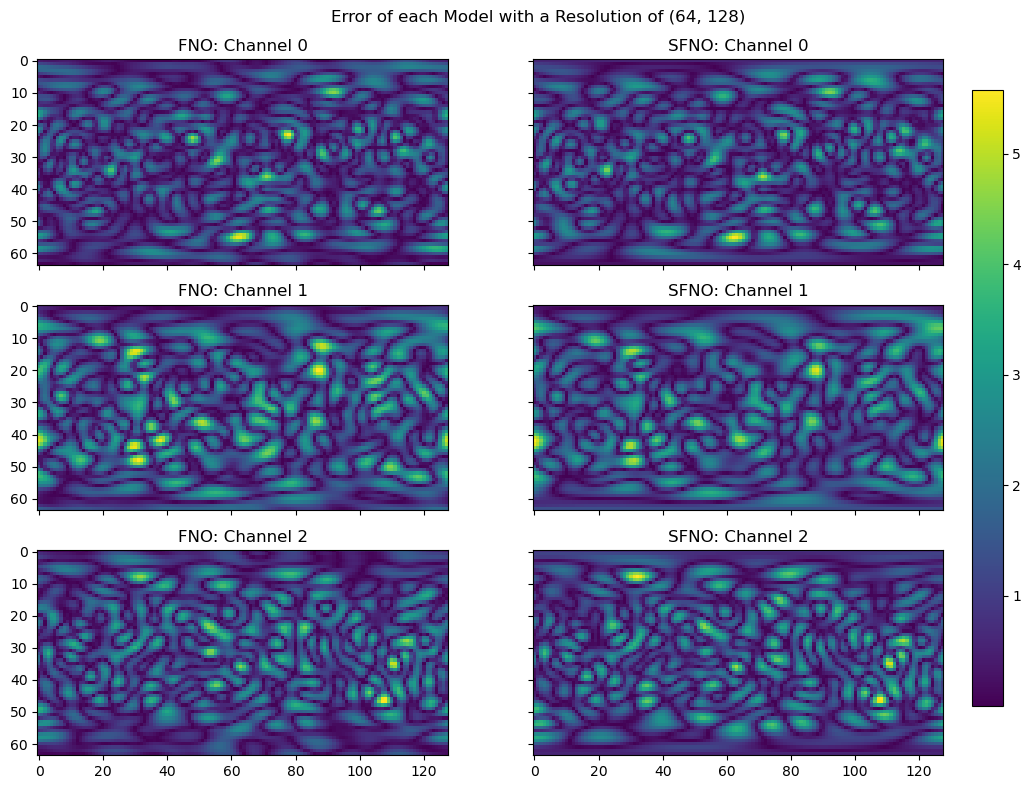

In [17]:
# Also here we want to compare the results for a higher resolution (64, 128)
sfno.errplot_fno_sfno(pred_fno_res2, pred_sfno_res2, batch_idx=batch, res=resolution)

## Scaling Study

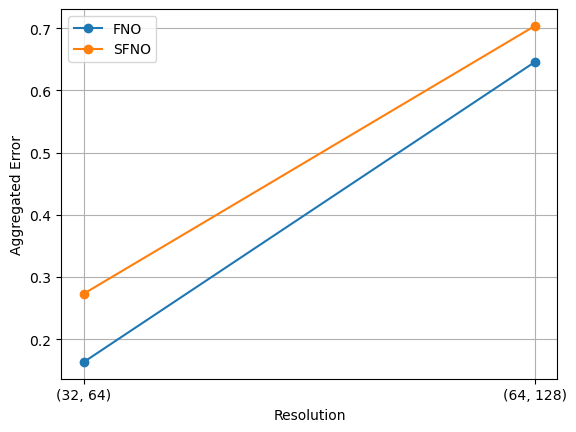

In [18]:
# Last task is to do a scaling study, since the dataset has a max resolution of 
# (128, 128) and when we should start from (32, 64) it is only possible to compare
# the results for the two resolutions:

# res_1 = (32, 64)
# res_2 = (64, 128)
sfno.scaling_study(pred_fno_res1, pred_fno_res2, pred_sfno_res1, pred_sfno_res2)